In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm # plotting tools and stastical methods
from statsmodels.tsa.seasonal import seasonal_decompose # decompose and provides useful abstract model
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES is tsf method forunivariate data without a trend or seasonality
from statsmodels.tsa.holtwinters import Holt # helps to forecast time series data that has a trend
from statsmodels.tsa.api import ExponentialSmoothing # used for producing smooth time series
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import matplotlib
from pylab import rcParams
from statsmodels.tsa.arima.model import ARIMA # autoregressive integrated moving average 
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [2]:
coke = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [3]:
df = coke.copy()

In [4]:
df.head().T

,0,1,2,3,4
Quarter,Q1_86,Q2_86,Q3_86,Q4_86,Q1_87
Sales,1734.827,2244.960999,2533.804993,2154.962997,1547.818996


In [5]:
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [6]:
df.dtypes

Quarter     object
Sales      float64
dtype: object

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,42.0,2994.353308,977.930896,1547.818996,2159.714247,2782.376999,3609.25,5253.0


In [8]:
'''

The overall effect of this code is to replace strings in the "Quarter" column that match the pattern "Q\d_\d+" (e.g., "Q1_2022")
with a new format "19YY-Qx" (e.g., "2022-Q1") and store the result in the temp variable. The original DataFrame df remains
unchanged, and new_df now contains the modified values from the "Quarter" column.

'''

new_df = df.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')

In [9]:
new_df

0     1986-Q1
1     1986-Q2
2     1986-Q3
3     1986-Q4
4     1987-Q1
5     1987-Q2
6     1987-Q3
7     1987-Q4
8     1988-Q1
9     1988-Q2
10    1988-Q3
11    1988-Q4
12    1989-Q1
13    1989-Q2
14    1989-Q3
15    1989-Q4
16    1990-Q1
17    1990-Q2
18    1990-Q3
19    1990-Q4
20    1991-Q1
21    1991-Q2
22    1991-Q3
23    1991-Q4
24    1992-Q1
25    1992-Q2
26    1992-Q3
27    1992-Q4
28    1993-Q1
29    1993-Q2
30    1993-Q3
31    1993-Q4
32    1994-Q1
33    1994-Q2
34    1994-Q3
35    1994-Q4
36    1995-Q1
37    1995-Q2
38    1995-Q3
39    1995-Q4
40    1996-Q1
41    1996-Q2
Name: Quarter, dtype: object

In [10]:
'''

The result of this code is a Series of strings where each element represents a formatted date in the format 
"AbbreviatedMonth-Year" (e.g., "Jan-2022")

'''

df['quater'] = pd.to_datetime(new_df).dt.strftime('%b-%Y')

In [11]:
df.head()

,Quarter,Sales,quater
0,Q1_86,1734.827000,Jan-1986
1,Q2_86,2244.960999,Apr-1986
2,Q3_86,2533.804993,Jul-1986
3,Q4_86,2154.962997,Oct-1986
4,Q1_87,1547.818996,Jan-1987


In [12]:
df = df.drop(columns = ['Quarter'])

In [13]:
df.reset_index(inplace=True)

In [14]:
df['quater'] = pd.to_datetime(df['quater'])

In [15]:
df = df.set_index('quater')

In [16]:
df.head()

,index,Sales
quater,,
1986-01-01,0,1734.827000
1986-04-01,1,2244.960999
1986-07-01,2,2533.804993
1986-10-01,3,2154.962997
1987-01-01,4,1547.818996


<Axes: xlabel='quater'>

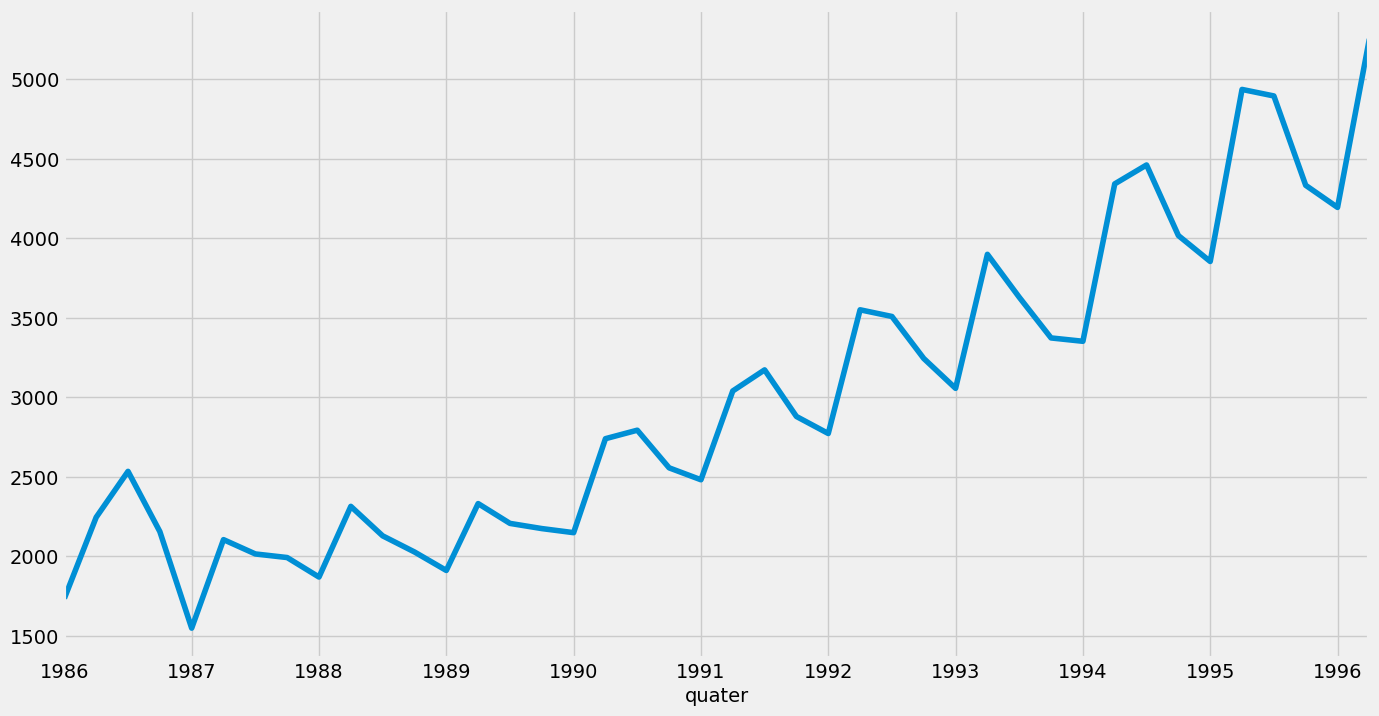

In [17]:
df['Sales'].plot(figsize=(15, 8))

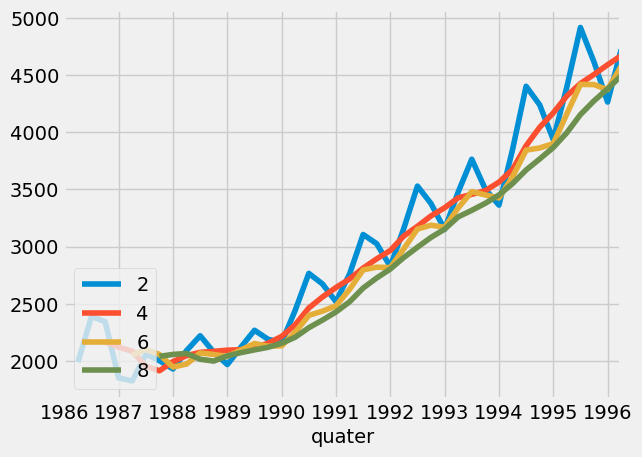

In [18]:
for i in range(2,10,2):
    df["Sales"].rolling(i).mean().plot(label = str(i))
plt.legend(loc=3)

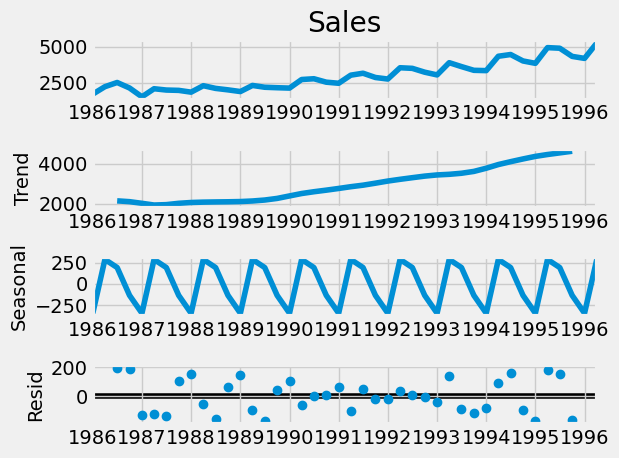

In [19]:
'''

from statsmodels.tsa.seasonal import seasonal_decompose # decompose and provides useful abstract model

'''

ts_add = seasonal_decompose(df.Sales, model="additive")
fig = ts_add.plot()
plt.show()


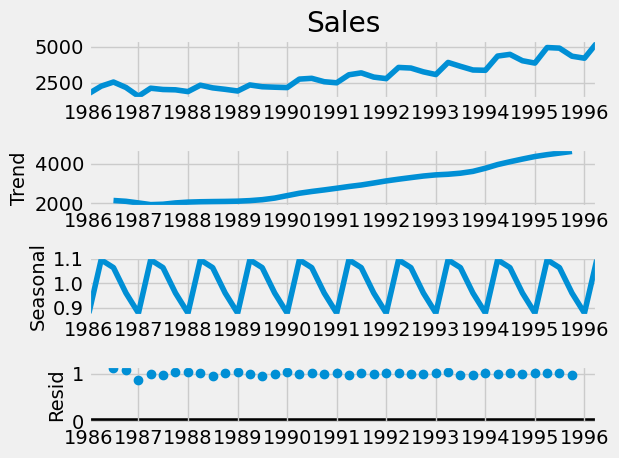

In [61]:
ts_mul = seasonal_decompose(df.Sales,model = "multiplicative")
fig = ts_mul.plot()
plt.show()

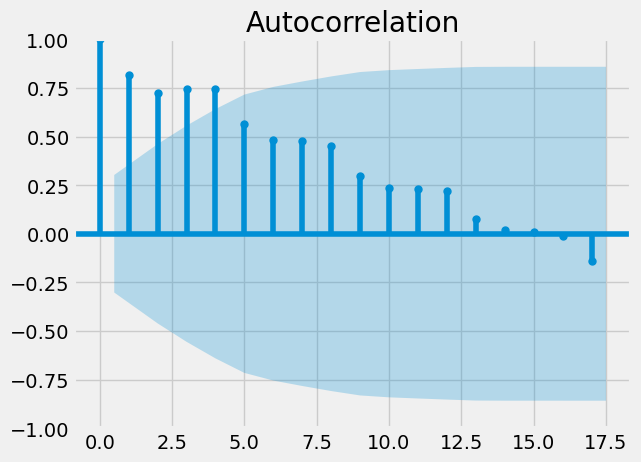

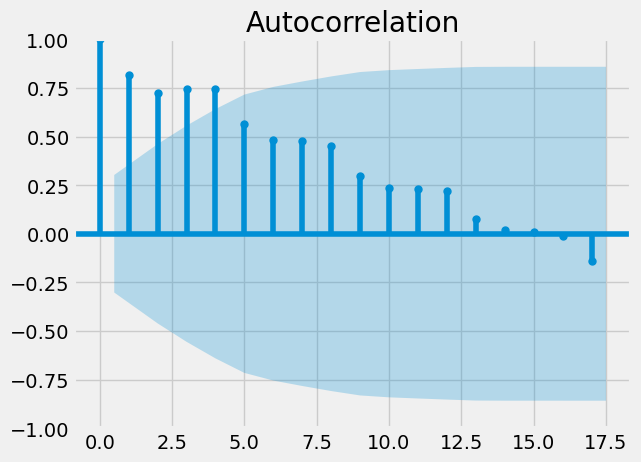

In [21]:
# ACF --> auto correlation factor in the ststsmodeling
# import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(df.Sales)


# Building Time series forecasting with ARIMA

In [22]:
# AutoRegressive Integrated Moving Average --> ARIMA

In [23]:
x = df['Sales'].values

In [24]:
size = int(len(x) * 0.7)

In [25]:
train, test = x[0:size], x[size:len(x)]

In [26]:
model = ARIMA(train, order=(5,1,0))

In [27]:
result = model.fit()

In [62]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   29
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -186.531
Date:                Fri, 14 Jul 2023   AIC                            385.061
Time:                        20:27:22   BIC                            393.054
Sample:                             0   HQIC                           387.505
                                 - 29                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1191      0.280     -0.426      0.670      -0.667       0.429
ar.L2         -0.2003      0.142     -1.413      0.158      -0.478       0.078
ar.L3         -0.1058      0.173     -0.613      0.5

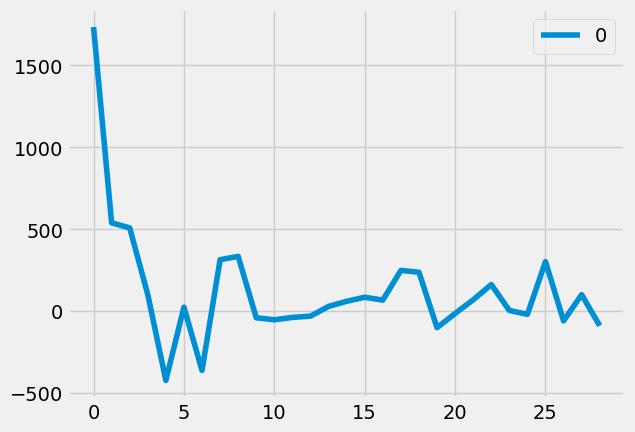

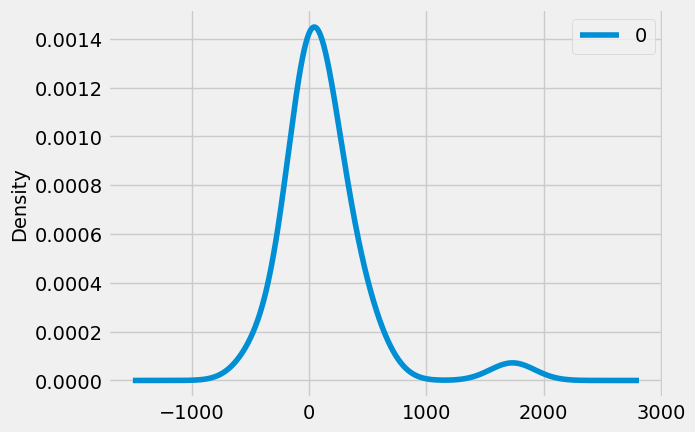

                 0
count    29.000000
mean    128.154422
std     373.786198
min    -422.166227
25%     -37.447169
50%      60.978555
75%     238.227861
max    1734.827000


In [60]:
residuals = pd.DataFrame(result.resid)
residuals.plot()
pyplot.show()
# (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable.
residuals.plot(kind = 'kde')   # kde --> kernal density estimator 
pyplot.show()
print(residuals.describe())

# Rolling Forecast ARIMA Model

In [30]:
history = [x for x in train]

In [31]:
predictions = list()

for i in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    y_hat = output[0]
    predictions.append(y_hat)
    obs = test[i]
    history.append(obs)
    print('predicted=%f, expected=%f' % (y_hat, obs))  # %f is used to format floating-point numbers ex: 2.10000 for 2.1

predicted=3717.472605, expected=3899.000000
predicted=3775.837495, expected=3629.000000
predicted=3332.727871, expected=3373.000000
predicted=3258.576338, expected=3352.000000
predicted=4081.006048, expected=4342.000000
predicted=3955.786233, expected=4461.000000
predicted=4146.277853, expected=4017.000000
predicted=3958.436750, expected=3854.000000
predicted=4701.652911, expected=4936.000000
predicted=4990.072284, expected=4895.000000
predicted=4390.352783, expected=4333.000000
predicted=4190.807855, expected=4194.000000
predicted=5176.917412, expected=5253.000000


In [32]:
len(predictions)

13

In [33]:
mse = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % mse)

Test MSE: 37606.712


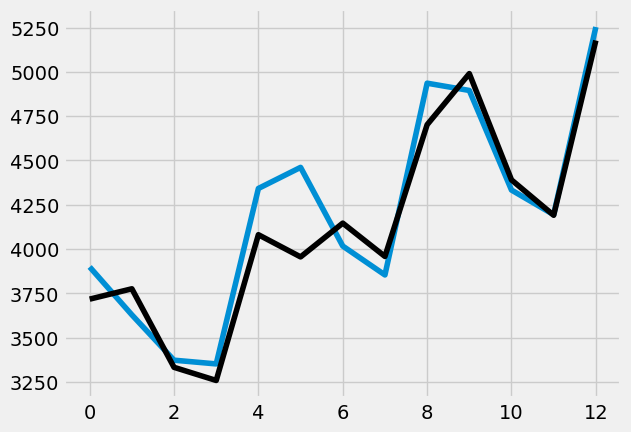

In [34]:
pyplot.plot(test)
pyplot.plot(predictions, color='black')
pyplot.show()

# A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (black). We can see the values show some trend and are in the correct scale

# comparing multiple models

In [35]:
df_dum = pd.get_dummies(coke, columns = ['Quarter'])

In [36]:
 df_dum.columns = ['Sales','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4']

In [37]:
df_dum.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2154.962997,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
k = np.arange(1,43)

In [39]:
df_dum['k'] = k
df_dum.shape

(42, 44)

In [40]:
df_dum['k_sqr'] = df_dum['k'] * df_dum['k']

In [41]:
log_Sales=np.log(df_dum['Sales'])

In [42]:
df_dum['log_sales'] = log_Sales

In [43]:
train1, test1 = np.split(df_dum, [int(.70 *len(df_dum))])

In [44]:
train1

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,k,k_sqr,log_sales
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,7.458663
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,7.716443
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,7.837477
3,2154.962997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,7.675529
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,25,7.344602
5,2104.411995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,36,7.651791
6,2014.362999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,49,7.608058
7,1991.746998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,64,7.596767
8,1869.049999,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,81,7.533186
9,2313.631996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10,100,7.746574


In [45]:
linear = smf.ols('Sales ~ k',data=train1).fit()       # linear
predlin = pd.Series(linear.predict(pd.DataFrame(test1['k'])))
rmselin = np.sqrt((np.mean(np.array(test1['Sales']) - np.array(predlin))**2))
rmselin

659.9861744200205

In [46]:
quad = smf.ols('Sales ~ k + k_sqr',data = train1).fit()    #quardatic
predquad = pd.Series(quad.predict(pd.DataFrame(test1[['k','k_sqr']])))
rmsequad = np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predquad))**2))
rmsequad

508.41681509771456

In [47]:
expo=smf.ols('log_sales ~ k',data = train1).fit()     # exponential
predexp=pd.Series(expo.predict(pd.DataFrame(test1['k'])))
rmseexpo=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

637.5585943826359

In [48]:
train1.shape

(29, 46)

In [49]:
df_dum['log_sales'].shape

(42,)

In [50]:
additive= smf.ols('Sales ~ Q1+Q2+Q3+Q4',data = train1).fit()   #additive
predadd=pd.Series(additive.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmseadd=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predadd))**2))
rmseadd

1907.9579615578114

In [51]:
addlinear = smf.ols('Sales ~ k+Q1+Q2+Q3+Q4',data=train1).fit()     #additive linear
predaddlinear = pd.Series(addlinear.predict(pd.DataFrame(test1[['k','Q1','Q2','Q3','Q4']])))
rmseaddlinear = np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

648.1088880541315

In [52]:
addquad = smf.ols('Sales ~ k+k_sqr+Q1+Q2+Q3+Q4',data=train1).fit()    #additive quardatic
predaddquad = pd.Series(addquad.predict(pd.DataFrame(test1[['k','k_sqr','Q1','Q2','Q3','Q4']])))
rmseaddquad = np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddquad))**2))
rmseaddquad

530.2531084790245

In [53]:
mulsea=smf.ols('log_sales ~ Q1 + Q2 + Q3 + Q4',data=train1).fit()     #multiple
predmul= pd.Series(mulsea.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmsemul= np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

2409.885792910403

In [54]:
mullin= smf.ols('log_sales ~ k+Q1+Q2+Q3+Q4',data=train1).fit()   # multilinear
predmullin= pd.Series(mullin.predict(pd.DataFrame(test1[['k','Q1','Q2','Q3','Q4']])))
rmsemulin=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin

4563.200400952829

In [55]:
mul_quad= smf.ols('log_sales ~ k+k_sqr+Q1+Q2+Q3+Q4',data = train1).fit()    #multi quardatic
pred_mul_quad= pd.Series(mul_quad.predict(test1[['k','k_sqr','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

3610.8829094486523

In [56]:
output = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
             'Values':pd.Series([rmse_mul_quad , rmseadd , rmseaddlinear, rmseaddquad , rmseexpo , rmselin , rmsemul , rmsemulin , rmsequad])}

In [57]:
rmse=pd.DataFrame(output)

In [58]:
rmse

,Model,Values
0,rmse_mul_quad,3610.882909
1,rmseadd,1907.957962
2,rmseaddlinear,648.108888
3,rmseaddquad,530.253108
4,rmseexpo,637.558594
5,rmselin,659.986174
6,rmsemul,2409.885793
7,rmsemulin,4563.200401
8,rmsequad,508.416815


# For the best forecasting model, the RMSE (Root Mean Squared Error) value    should be as low as possible. In the above case quardatic has the best RMSE Trend with a value of 508.41